# Visualizing a Decision Tree
https://www.youtube.com/watch?v=tNa99PG8hR8

## Import dataset

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn import tree

In [2]:
iris = load_iris()
print(iris.feature_names)
print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


From the features, we want to guess what the label is.  
In order to do this, we'll need to train a classifier using traning data.  
This is called **Supervised Learning**. 

### Split data into training data and testing data
In order to test the classifier's accuracy, we need to split the data into **training data** and **testing data**.  

In [3]:
test_idx = [0, 50, 100]

# training data
train_target = np.delete(iris.target, test_idx)
train_data = np.delete(iris.data, test_idx, axis=0)

# testing data
test_target = iris.target[test_idx]
test_data = iris.data[test_idx]

## Train a classifier

We'll use the **Decision Tree Classifier** to classify the training data. 

In [4]:
clf = tree.DecisionTreeClassifier()
clf.fit(train_data, train_target)

DecisionTreeClassifier()

## Predict label for new features

In [5]:
print(test_target)
print(clf.predict(test_data))

[0 1 2]
[0 1 2]


## Visualize the tree

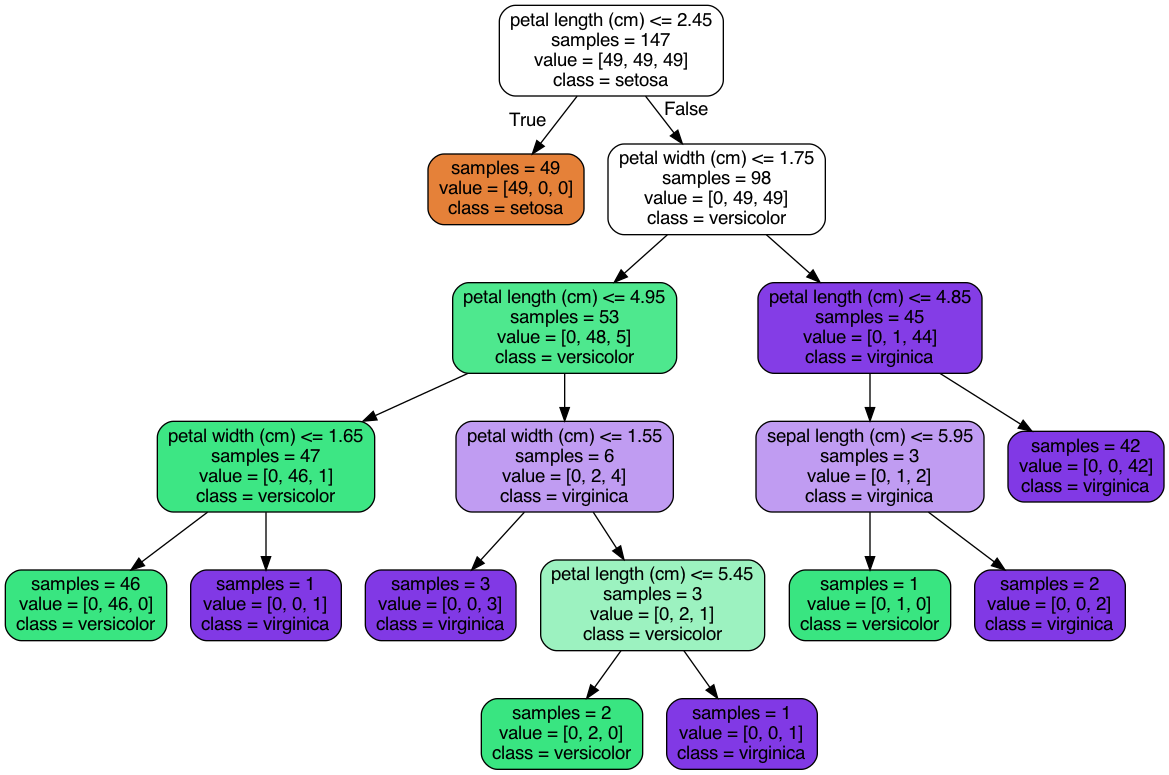

In [6]:
from six import StringIO
import pydot
from IPython.display import Image

dot_data = StringIO()
tree.export_graphviz(clf, 
                    out_file=dot_data, 
                    feature_names=iris.feature_names,
                    class_names=iris.target_names,
                    filled=True,
                    rounded=True,
                    impurity=False
                    )
graph, = pydot.graph_from_dot_data(dot_data.getvalue())
display(Image(graph.create(format='png')))

By selecting better features, we can build a better tree.  
Choosing good features is one of the most important jobs.  